In [1]:
import gzip
import pickle

import numpy as np
import graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
balanced_fit = np.load(gzip.open('balanced_fit.npy.gz', 'rb'))
ordered_features = pickle.load(open('ordered_features', 'rb'))

# Cost function

In [3]:
ordered_features

['DP', 'FS', 'HRun', 'MQ0', 'QD', 'QUAL', 'ReadPosRankSum']

# Decision Tree

In [4]:
train_X = balanced_fit[:,:-1]
train_Y = balanced_fit[:,-1]

In [5]:
forest_estimator = RandomForestClassifier(n_estimators=10)
forest_fit = forest_estimator.fit(train_X, train_Y)

In [6]:
forest_fit.feature_importances_

array([0.06239098, 0.12859534, 0.00851952, 0.01230942, 0.35914566,
       0.33240327, 0.0966358 ])

In [7]:
estimator = tree.DecisionTreeClassifier(max_depth=5)
tree_fit = estimator.fit(train_X, train_Y)

In [8]:
tree_fit.feature_importances_

array([0.00456459, 0.01844343, 0.        , 0.        , 0.00357183,
       0.96501191, 0.00840824])

In [9]:
graphviz_representation = tree.export_graphviz(tree_fit, out_file=None,
                                               max_depth=5,
                                               feature_names=ordered_features,
                                               filled=True, rounded=True, special_characters=True)
#class_names
graph = graphviz.Source(graphviz_representation)
#render

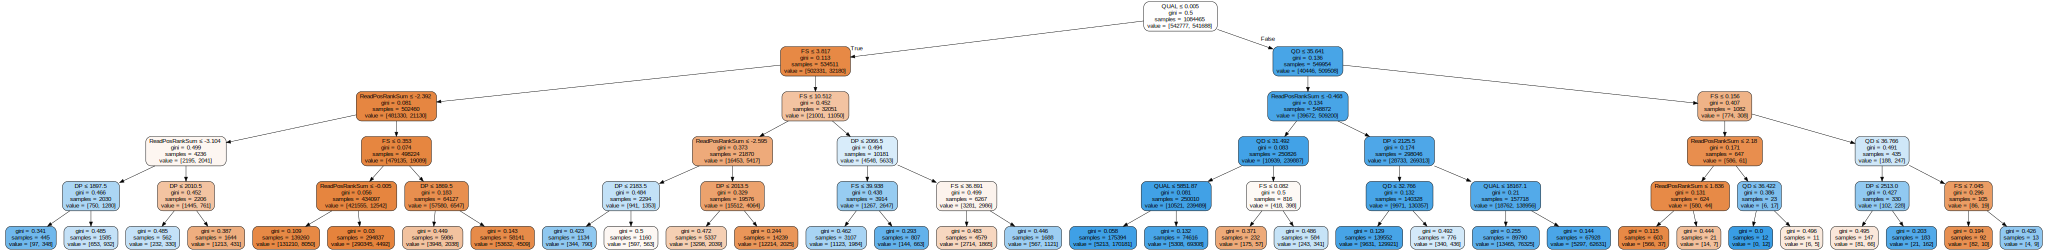

In [10]:
graph

In [11]:
len(train_X), len(train_Y)

(1084465, 1084465)

In [12]:
train_X.shape, train_Y.shape

((1084465, 7), (1084465,))

In [13]:
len([x for x in train_Y if x >0])

541688

In [14]:
tree.export_graphviz(forest_fit)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.